In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import scipy.stats as stat #To determine quantiles of a Student law
from sklearn.linear_model import LinearRegression #Verification of our manual linear regression
from mpl_toolkits.mplot3d import Axes3D #3-Dimensions plot

# Enable inline plotting
%matplotlib inline

# Version I'm working with: Python 3.6.6, Pandas 0.23.4, Matplotlib 3.0.0
print('Python version ' + sys.version) 
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.23.4
Matplotlib version 3.0.2


# Question 1

In [2]:
# Export the dataset from the .txt file and print the 5 first lines
Location = r'./invest.txt'
invest_df = pd.read_csv(Location, sep=' ')
invest_df[:5]

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


# Question 2

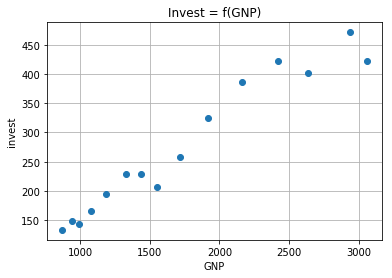

In [3]:
# Ploting data
gnp = invest_df['gnp']
invest = invest_df['invest']
interest = invest_df['interest']

fig, ax = plt.subplots()
ax.plot(gnp, invest, 'o')

ax.set(xlabel='GNP', ylabel='invest', title='Invest = f(GNP)')
ax.grid()
plt.show()

In [4]:
#Creating gnp_log and invest_log
gnp_log = np.log(gnp);
invest_log = np.log(invest);

# Question 3

In [5]:
n = len(invest);
invest_mean = np.mean(invest);
gnp_mean = np.mean(gnp);
invest_mean_log = np.mean(invest_log);
gnp_mean_log = np.mean(gnp_log);

#Linear Regression: Invest = a * gnp + b
a = np.sum([(gnp_log[i] - gnp_mean_log) * (invest_log[i] - invest_mean_log) for i in range(n)]);
b = np.sum([(gnp_log[i] - gnp_mean_log)**2 for i in range(n)]);
gnp_estimator = a/b;

#Invest estimator computed
invest_estimator = invest_mean_log - gnp_estimator*gnp_mean_log;
print("Linear Regression computed: log(Invest) = ", gnp_estimator," * log(GNP)", invest_estimator)

#Standard Deviation
s_d = np.sum([(invest_log[i] - (invest_estimator + gnp_estimator*gnp_log[i]))**2 for i in range(n)])/(n-2);
sigma = np.sqrt(s_d);
print("\nStandard Deviation: sigma = ", sigma);

#Determination coefficient
a = np.sum([(invest_log[i] - (invest_estimator+ gnp_estimator*gnp_log[i]))**2 for i in range(n)]);
b = np.sum([(invest_log[i] - invest_mean_log)**2 for i in range(n)]);
R = 1 - a/b;
print("\nDetermination coefficient: R = ", R);

Linear Regression computed: log(Invest) =  1.0152814015988707  * log(GNP) -1.9635913352301815

Standard Deviation: sigma =  0.08761471654613968

Determination coefficient: R =  0.9627572956057855


# Question 4

In [6]:
V_slope = s_d/np.sum([(gnp_log[i] - gnp_mean_log)**2 for i in range(n)]);
slope_test = gnp_estimator/np.sqrt(V_slope);
t_quantile = stat.t.interval(0.95, df = n);

#Statistical test for H0
if t_quantile[0] <= slope_test <= t_quantile[1] : print("Test not rejected");
else : print ("Test rejected");

#p-value computed
p_value = 1 - (stat.t.cdf(slope_test, df = n) - stat.t.cdf(-slope_test, df = n))
print("\nThe p-value of the statistical test is ", p_value)

Test rejected

The p-value of the statistical test is  1.1099898777899853e-11


# Question 5

In [7]:
#Estimation of the investment for GNP = 1000
GNP_value = 1000;
def invest_estimation(x):
    return np.exp((invest_estimator + np.log(x) * gnp_estimator))

print("The investment estimation for a GNP value of 1000 is", invest_estimation(GNP_value));

def CI(x):
    CI_R = np.log(invest_estimation(x)) - stat.t.ppf(0.05, df = n-2 )*sigma*np.sqrt(1/n + (np.log(x) - gnp_mean_log)**2/np.sum([(gnp_log[i] - gnp_mean_log)**2 for i in range(n)]));
    CI_L = np.log(invest_estimation(x)) + stat.t.ppf(0.05, df = n-2 )*sigma*np.sqrt(1/n + (np.log(x) - gnp_mean_log)**2/np.sum([(gnp_log[i] - gnp_mean_log)**2 for i in range(n)]));
    return (CI_L, CI_R)

def PI(x):
    PI_R = np.log(invest_estimation(x)) - stat.t.ppf(0.05, df = n-2 )*sigma*np.sqrt(1 + 1/n + (np.log(x) - gnp_mean_log)**2/np.sum([(gnp_log[i] - gnp_mean_log)**2 for i in range(n)]));
    PI_L = np.log(invest_estimation(x)) + stat.t.ppf(0.05, df = n-2 )*sigma*np.sqrt(1 + 1/n + (np.log(x) - gnp_mean_log)**2/np.sum([(gnp_log[i] - gnp_mean_log)**2 for i in range(n)]));
    return(PI_L, PI_R)

#Confidence interval
print("\nConfidence interval at the level 5% is: [", np.exp(CI(1000)[0]) ,",", np.exp(CI(1000)[1]),"]")

#Prediction interval
print("\nPrediction interval at the level 5% is: [", np.exp(PI(1000)[0]) ,",", np.exp(PI(1000)[1]),"]") 

The investment estimation for a GNP value of 1000 is 155.9794279310548

Confidence interval at the level 5% is: [ 146.6755267342194 , 165.87349286827566 ]

Prediction interval at the level 5% is: [ 132.00238933412925 , 184.31167845087407 ]


# Question 6

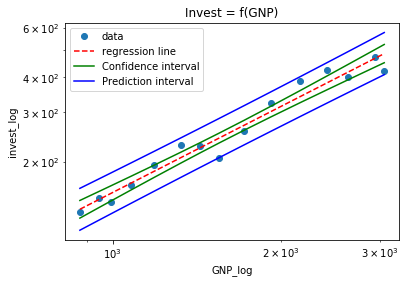

In [8]:
#Complete Plot
fig, ax = plt.subplots()
ax.plot(gnp, invest, 'o', label = 'data')
ax.plot(gnp, np.exp(gnp_estimator*gnp_log + invest_estimator), 'r--')
ax.plot(gnp, np.exp(CI(gnp)[0]) , 'g')
ax.plot(gnp, np.exp(PI(gnp)[0]) , 'b')
ax.plot(gnp, np.exp(CI(gnp)[1]) , 'g')
ax.plot(gnp, np.exp(PI(gnp)[1]) , 'b')

ax.set(xlabel='GNP_log', ylabel='invest_log', title='Invest = f(GNP)')
plt.yscale('log');
plt.xscale('log');
plt.legend(('data','regression line', 'Confidence interval', 'Prediction interval'))
plt.show()

# Question 7

In [9]:
#Linear Regression from sklearn
regr = LinearRegression();
regr.fit(gnp_log.values.reshape(-1,1), invest_log);

print("Linear Regression from sklearn: log(Invest) = ", regr.coef_[0] ," * log(GNP)", regr.intercept_);
print("\nDetermination Coefficient from sklearn: ",regr.score(gnp_log.values.reshape(-1,1), invest_log));

#Prediction
print("\nSklearn prediction for GNP value of 1000: ",np.exp(regr.predict(np.array(np.log(1000)).reshape(1,-1))[0]))

Linear Regression from sklearn: log(Invest) =  1.015281401598871  * log(GNP) -1.9635913352301815

Determination Coefficient from sklearn:  0.9627572956057855

Sklearn prediction for GNP value of 1000:  155.97942793105494


# Question 8

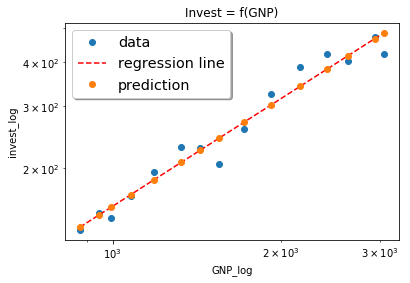

In [10]:
#Plot of the dataset and the regression line
fig, ax = plt.subplots()
ax.plot(gnp, invest, 'o', label = 'data')
ax.plot(gnp, np.exp(gnp_estimator*gnp_log + invest_estimator), 'r--', label = 'regression line' )

prediction = np.exp(regr.predict(gnp_log.values.reshape(-1,1)));
ax.plot(gnp, prediction, 'o', label = 'prediction')

ax.set(xlabel='GNP_log', ylabel='invest_log', title='Invest = f(GNP)')
plt.yscale('log');
plt.xscale('log');
ax.legend(loc='best', shadow=True, fontsize='x-large')

plt.show()

# Question 9

In [11]:
#Build and computation of Gram Matrix
X = np.transpose(np.array([[gnp[i] for i in range(n) ], [interest[i] for i in range(n)] ]))
gram = np.dot(np.transpose(X), X)/n;

print("Gram Matrix on interest and gnp: \n", gram);
print("\nRank of Gram Matrix: ", np.ndim(gram));

Gram Matrix on interest and gnp: 
 [[3.56630045e+06 1.47355931e+04]
 [1.47355931e+04 6.29237133e+01]]

Rank of Gram Matrix:  2


# Question 10

In [12]:
#Computation of the Theta vector for the linear coefficients
X2 = np.concatenate((np.transpose(np.array([[1 for i in range(n)]])), X), axis = 1);
theta = np.dot(np.linalg.inv(np.dot(np.transpose(X2), X2)), np.transpose(X2));
theta = np.dot(theta, invest)
print("Invest = ", theta[2]," * interest + ", theta[1]," * gnp + ", theta[0]);

#Standard Deviation
sigma2 = (np.sum([ (invest[i] - theta[1]*gnp[i] - theta[2]*interest[i] - theta[0])**2 for i in range(n)]))/(n-3);
print("\nStandard deviation: sigma = ", np.sqrt(sigma2))

#Student Test
C = sigma2*np.linalg.inv(np.dot(np.transpose(X2), X2))
#i parameter corresponds to the index of the features
def Var_Beta(i):
    return C[i][i]

def Beta_test(i):
    return theta[i]/np.sqrt(Var_Beta(i));

t_quantile = stat.t.interval(0.95, df = n-3);
def Student_test_Beta(i):
    if t_quantile[0] <= Beta_test(i) <= t_quantile[1] : print("\nTest accepted on the null hypothesis for Beta", i,":", theta[i]);
    else: print("\nTest non accepted for Beta", i,":", theta[i]);
    
def pvalue_Beta(i):
    return 1 - (stat.t.cdf(Beta_test(i), df = n-3) - stat.t.cdf(-Beta_test(i), df = n-3));

for i in range(3):
    Student_test_Beta(i);
    print("\np value for Beta ", i, ": ", pvalue_Beta(i));

#Determination coefficient
def invest_estimation(gnp, interest):
    return theta[0] + theta[1]*gnp + theta[2]*interest;

invest_mean = np.sum(invest)/n;
print("\nDetermination coefficient :", 1 - np.sum([ (invest[i] - invest_estimation(gnp[i], interest[i]))**2 for i in range(n)])/np.sum([(invest[i] - invest_mean)**2 for i in range(n)]));


Invest =  -0.46064224909495266  * interest +  0.15650676187505574  * gnp +  5.764652338145751

Standard deviation: sigma =  29.40632255340636

Test accepted on the null hypothesis for Beta 0 : 5.764652338145751

p value for Beta  0 :  0.7993220018625629

Test non accepted for Beta 1 : 0.15650676187505574

p value for Beta  1 :  1.4300363522457005e-05

Test accepted on the null hypothesis for Beta 2 : -0.46064224909495266

p value for Beta  2 :  1.0612904283366345

Determination coefficient : 0.946389747506157


# Question 11

In [14]:
#Prediction of a GNP value of 1000 and interest of 10

def investment(gnp, interest):
    return theta[0] + theta[1]*gnp + theta[2]*interest;

print("log(Investment) prediction: ", np.log(investment(1000,10)));

#Confidence interval 2-Dimensions
def CI(gnp, interest):
    XTX = np.linalg.inv(np.dot(np.transpose(X2), X2));
    x = np.array([1, gnp, interest]);
    CI_R = investment(gnp,interest) - stat.t.ppf(0.001, df = n-3 )*np.sqrt(sigma2*np.dot(np.dot(np.transpose(x), XTX), x));
    CI_L = investment(gnp,interest) + stat.t.ppf(0.001, df = n-3 )*np.sqrt(sigma2*np.dot(np.dot(np.transpose(x), XTX), x));
    return (CI_L, CI_R)

#Prediction interval 2-Dimensions
def PI(gnp, interest):
    XTX = np.linalg.inv(np.dot(np.transpose(X2), X2));
    x = np.array([1, gnp, interest]);
    PI_R = investment(gnp,interest) - stat.t.ppf(0.001, df = n-3 )*np.sqrt(sigma2*(1 + np.dot(np.dot(np.transpose(x), XTX), x)));
    PI_L = investment(gnp,interest) + stat.t.ppf(0.001, df = n-3 )*np.sqrt(sigma2*(1 + np.dot(np.dot(np.transpose(x), XTX), x)));
    return (PI_L, PI_R)

print("\nConfidence Interval 99,9%:", CI(1000,10))
print("\nPrediction Interval 99,9%:", PI(1000,10))


log(Investment) prediction:  5.060472476441298

Confidence Interval 99,9%: (33.354153213220684, 281.97583023128334)

Prediction Interval 99,9%: (-12.059456532365346, 327.38943997686937)


# Question 12

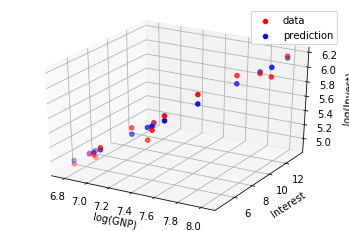

In [38]:
#3_Dimensions plot
fig = plt.figure()
ax = plt.axes(projection='3d');

ax.scatter3D(np.log(gnp), interest, np.log(invest), c='r');
ax.scatter3D(np.log(gnp), interest, [np.log(investment(gnp[i], interest[i])) for i in range(n)], c='b');

ax.set_xlabel('log(GNP)');
ax.set_ylabel('Interest');
ax.set_zlabel('log(Invest)');
plt.legend(('data','prediction'))
plt.show();

# Question 13

In [52]:
#Linear Regression from sklearn
regr = LinearRegression();
#Building the training set
X = [[gnp[i],interest[i]] for i in range(n)];
regr.fit(X, invest);

print("Linear Regression from sklearn: Invest = ", regr.coef_[0] ," * GNP +",regr.coef_[1], "* Interest +", regr.intercept_);
print("\nDetermination Coefficient from sklearn: ",regr.score(X, invest));

#Prediction
print("\nSklearn log(Investment) prediction for GNP value of 1000 and Interest value of 10: ",np.log(regr.predict(np.array([1000,10]).reshape(1,-1))[0]));

Linear Regression from sklearn: Invest =  0.1565067618750558  * GNP + -0.46064224909473506 * Interest + 5.764652338143264

Determination Coefficient from sklearn:  0.946389747506157

Sklearn log(Investment) prediction for GNP value of 1000 and Interest value of 10:  5.060472476441296


##### Those values are the same than the manual values computed before.